# California housing dataset analytics#
Firstly lets load the famous California housing dataset. Do not worry if you dont undertand this part of the code. We simply use the pandas library to create a dataframe of the data that we will import in the next lines. The dataframe creates a dataset representations similar to an Excel sheet with columns and rows.
Here, let's focus only on working with data.

In [ ]:
import pandas as pd
from sklearn.datasets import california_housing
import warnings
warnings.filterwarnings("ignore")

data = california_housing.fetch_california_housing()
cal_housing = pd.DataFrame(data= data.data, columns=data.feature_names)    

c:\users\mhroot\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Let's first take a look at the data by printing the first five rows.




In [ ]:
cal_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Let's use the info() funcion to get a description of the data. 

In [ ]:
cal_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


We can see that our dataset has a number of features, randomly we select the following:
- ...
- Population, with 20640 records
- Latitude, with 20640 records
- Longitude, with 20640 records
- ...


Let's us plot a histogram to undertand our data. Once again we will import the appropiate library called matplotlib.

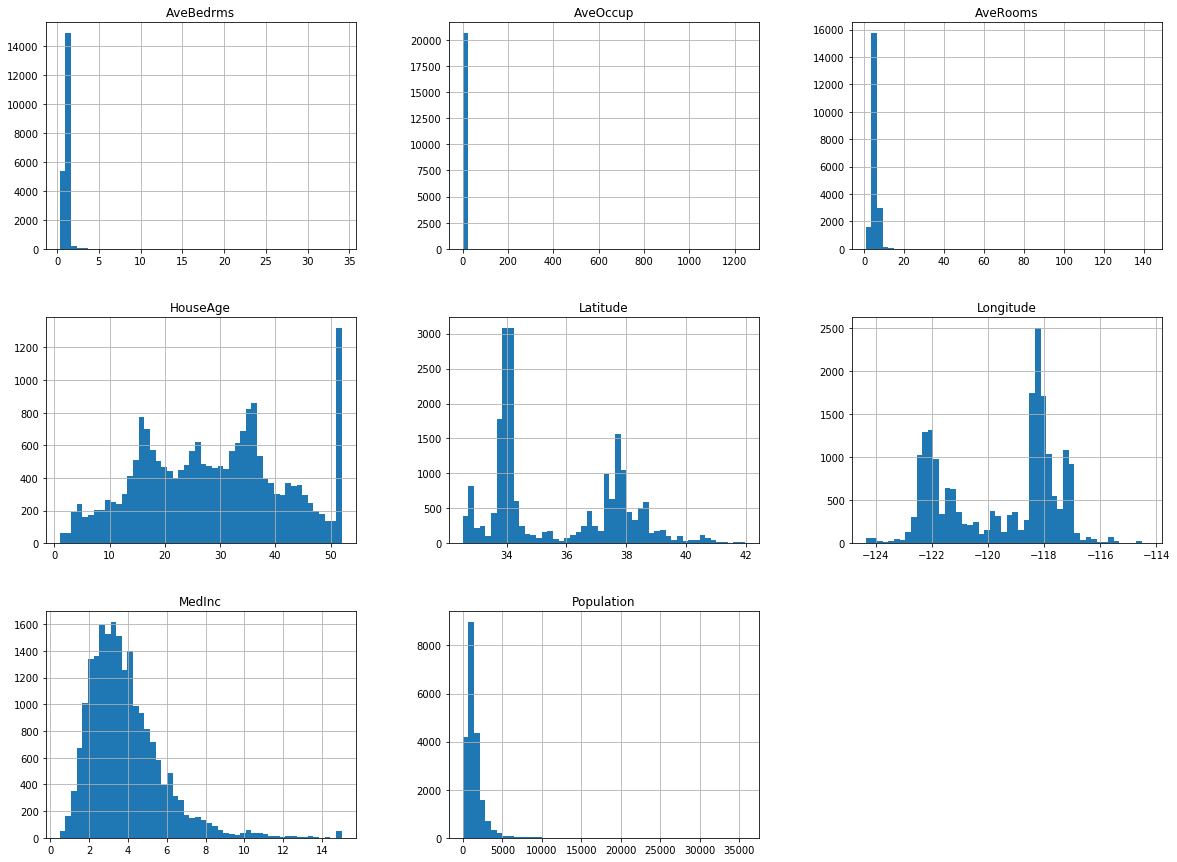

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
cal_housing.hist(bins=50, figsize=(20,15))
plt.show()

As we can see, there are differents diagrams representing the distribution of data per feature. Some features such as AveBedrms, AveOccup, AveRooms and Population are very scewed and can possible harm our future model. This is because these features have very different scales. Let's us try to plot scatterplot to see the distribution of our data in terms of the California map. 

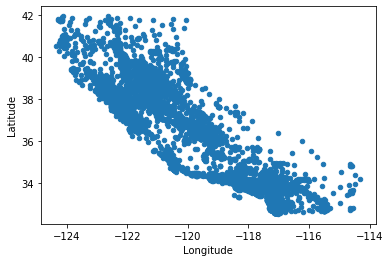

In [ ]:
cal_housing.plot(kind="scatter", x="Longitude", y="Latitude")

This visualisation is very strong in terms of the density of datapoints. Also a better visualisation could actually highlight the relationship of a feature such as house price to the location in map. The following scrip does exactly this. 

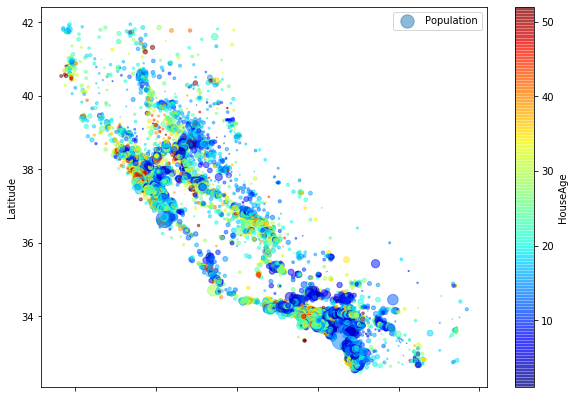

In [ ]:
cal_housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.5, 
                 s=cal_housing["Population"]/100, label="Population", figsize=(10,7),
                 c="HouseAge", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

The diagram represents the HouseAge per area in California, we can see that houses close to the big cities such as Los Angeles and San Frascisco are tend to be more old. We can also see that the newest houses are in the area between Los Angeles and San Diego.  

This is a simple example of a data analysis phase to identify the key features in order to understand our dataset. A good way to achieve this is to visualise the most promising features.  

Let us first examine the correlation of the average rooms with the rest of the features.

In [ ]:
cal_housing.corr()['AveRooms']

MedInc        0.326895
HouseAge     -0.153277
AveRooms      1.000000
AveBedrms     0.847621
Population   -0.072213
AveOccup     -0.004852
Latitude      0.106389
Longitude    -0.027540
Name: AveRooms, dtype: float64

Now, let us examine the correlation of the medium income with the rets of the features.

In [ ]:
cal_housing.corr()['MedInc']

MedInc        1.000000
HouseAge     -0.119034
AveRooms      0.326895
AveBedrms    -0.062040
Population    0.004834
AveOccup      0.018766
Latitude     -0.079809
Longitude    -0.015176
Name: MedInc, dtype: float64

Let's plot the correlation of average bedrooms to average rooms.

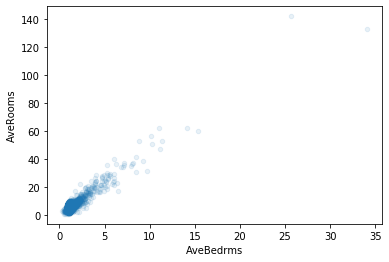

In [ ]:
cal_housing.plot(kind="scatter", x="AveBedrms",y= "AveRooms", alpha=0.1)

Let's work with the Boston dataset, first we will load it and create a new dataframe to store data.

In [ ]:
from sklearn.datasets import load_boston
boston_data = load_boston()
boston_data = pd.DataFrame(data= boston_data.data, columns=boston_data.feature_names)    

Let us see how the data look like.

In [ ]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are 14 attributes in each case of the dataset. They are:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 USD
- PTRATIO - pupil-teacher ratio by town
- B-1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in 1000's USD

Let's pring the correlation of the age and other features.

In [ ]:
boston_data.corr()['AGE']

CRIM       0.352734
ZN        -0.569537
INDUS      0.644779
CHAS       0.086518
NOX        0.731470
RM        -0.240265
AGE        1.000000
DIS       -0.747881
RAD        0.456022
TAX        0.506456
PTRATIO    0.261515
B         -0.273534
LSTAT      0.602339
Name: AGE, dtype: float64

Let's plot some diagrams and examine the results.

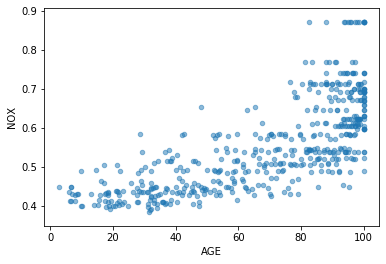

In [ ]:
boston_data.plot(kind="scatter", x="AGE",y= "NOX", alpha=0.5)

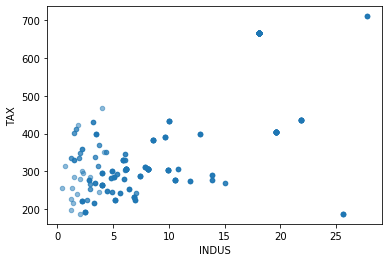

In [ ]:
boston_data.plot(kind="scatter", x="INDUS",y= "TAX", alpha=0.5)

Lets pring all the correlations among the features, as expected NOX and AGE are highly correlated (0.73). 

In [ ]:
boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


RM and LSTAT have negative correlation, while AGE and NOX have positive.

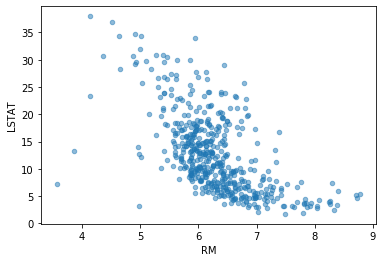

In [ ]:
boston_data.plot(kind="scatter", x="RM",y= "LSTAT", alpha=0.5)

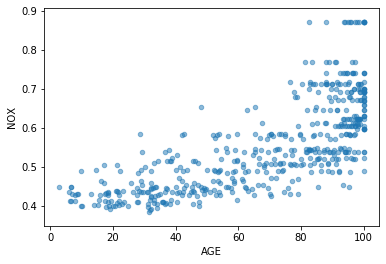

In [ ]:
boston_data.plot(kind="scatter", x="AGE",y= "NOX", alpha=0.5)

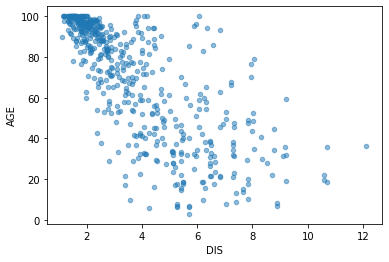

In [ ]:
boston_data.plot(kind="scatter", x="DIS",y= "AGE", alpha=0.5)

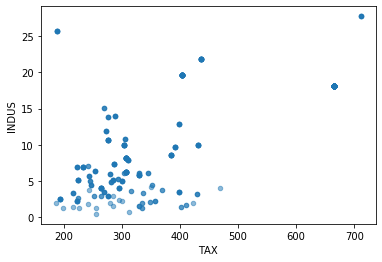

In [ ]:
boston_data.plot(kind="scatter", x="TAX",y= "INDUS", alpha=0.5)